In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf

In [2]:
librosa.__version__

'0.8.1'

In [3]:
filename = 'input/Nums_5dot1_24_48000.wav'
sampling_rate = 22050

## Loading

In [4]:
# Load audio file
y, sr = librosa.load(filename,sr = sampling_rate) #The sampling rate can be set here
y.shape

(199547,)

In [5]:
#Length of the audio file
y.shape[0]/sampling_rate

9.049750566893424

In [6]:
#The default of librosa.load is mono=True
multi_channel, sr = librosa.load('input/Nums_5dot1_24_48000.wav',mono=False)
#If set to false, the library loads all the different channels into a 2d array
multi_channel.shape

(6, 199547)

In [7]:
y.shape[0]/sr

9.049750566893424

## Plot

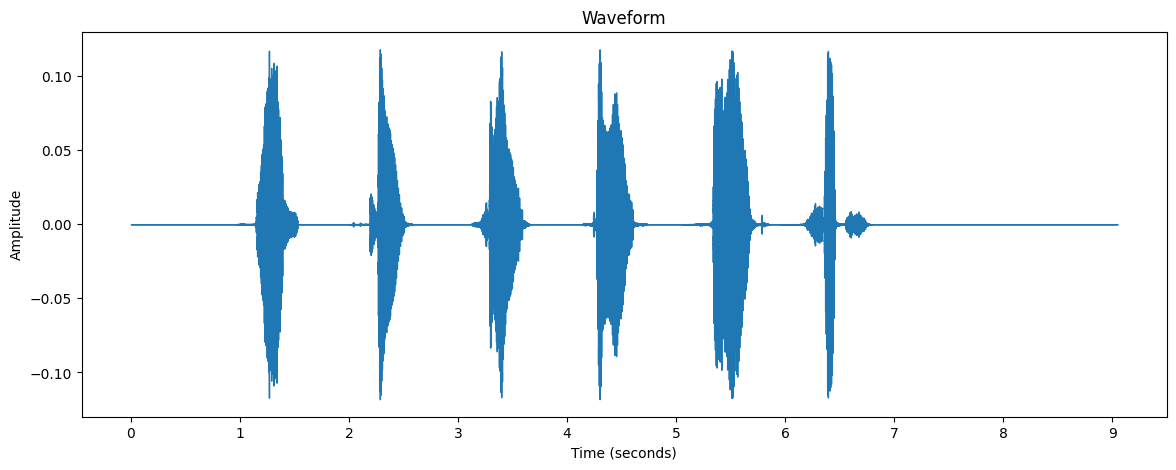

In [8]:
# Plot waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sampling_rate)
plt.title('Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()
# plt.show()


c:\Users\jordan.angulo\.conda\envs\sound_processing\lib\site-packages\librosa\util\utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


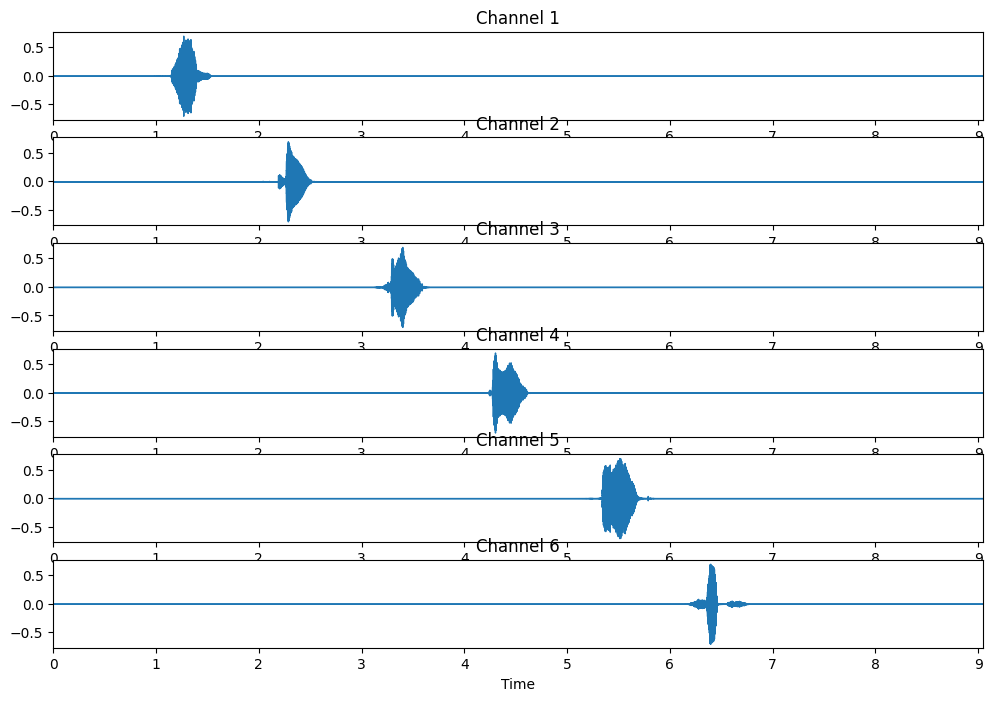

In [9]:
# Plot each channel
num_of_channels = multi_channel.shape[0]
plt.figure(figsize=(12, 8))
for i in range(num_of_channels):
    plt.subplot(num_of_channels, 1, i+1)
    librosa.display.waveplot(multi_channel[i], sr=sr)
    plt.title(f'Channel {i+1}')

## Increase volume

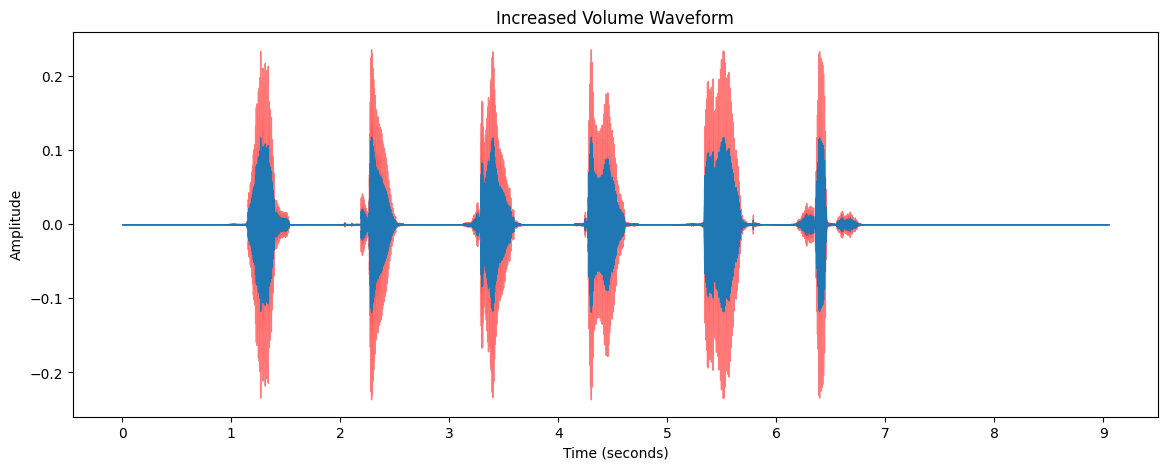

In [10]:
# Increase volume
y_loud = y * 2.0

# Plot increased volume waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y_loud, sr=sr,color='r',alpha=0.5)
librosa.display.waveshow(y, sr=sr)
plt.title('Increased Volume Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

## Trim audio

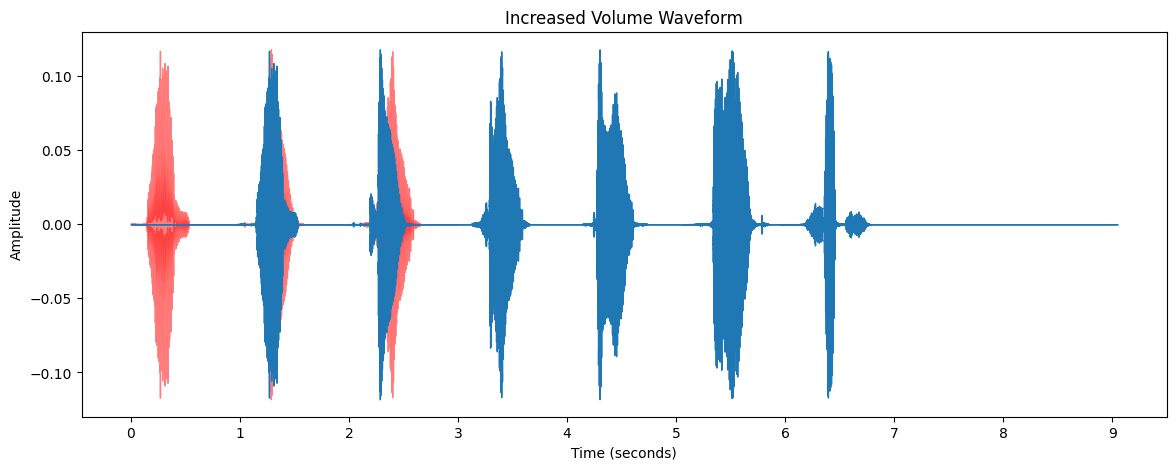

In [11]:
#Set constants for trimming
start_time = 1.0 # seconds
end_time = 4.0 # seconds
start_sample = int(start_time * sr)
end_sample = int(end_time * sr)
y_trimmed = y[start_sample:end_sample]

# Plot increased volume waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y_trimmed, sr=sr,color='r',alpha=0.5)
librosa.display.waveshow(y, sr=sr)
plt.title('Increased Volume Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

## Add silence

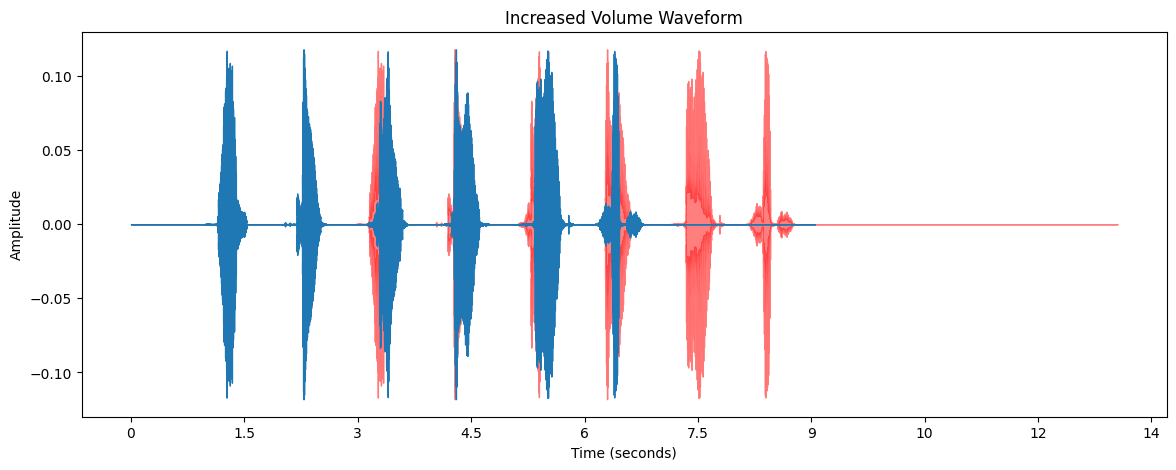

In [12]:
# Add silence
silence_duration = 2.0 # seconds
silence_samples = int(silence_duration * sr)
silence = np.zeros(silence_samples)
y_silence = np.concatenate([silence, y, silence])

# Plot increased volume waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y_silence, sr=sr,color='r',alpha=0.5)
librosa.display.waveshow(y, sr=sr)
plt.title('Increased Volume Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

## Convert to Mono


In [13]:
multi_channel.shape

(6, 199547)

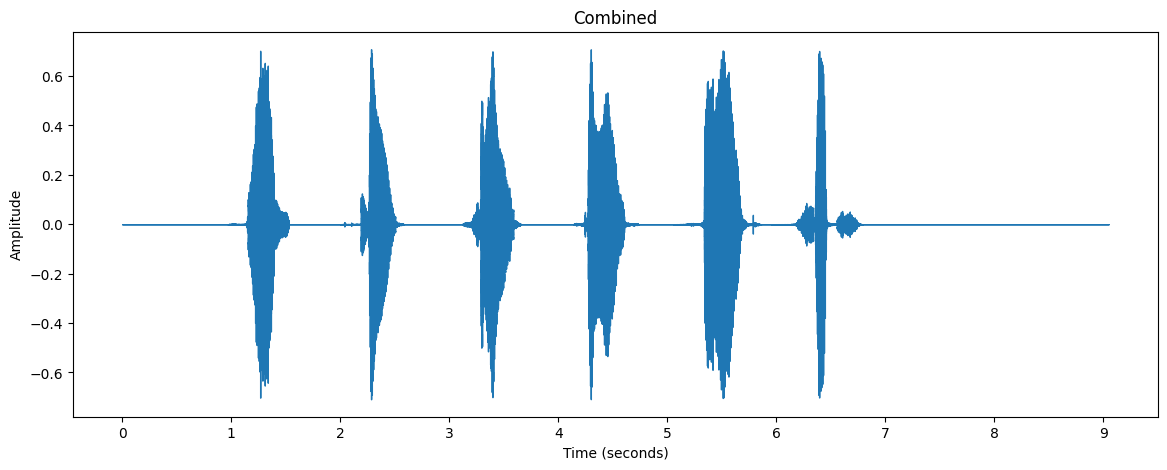

In [14]:
#Convert to mono by adding all the 6 arrays
converted_mono = np.sum(multi_channel,axis=0)

#Plot the results
plt.figure(figsize=(14, 5))
librosa.display.waveshow(converted_mono, sr=sr)
plt.title('Combined')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

In [15]:
sf.write('output/combined.wav',converted_mono,sr)